In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path_adhd = "../dataset/adhd_train.csv"
test_data_path_adhd = "../dataset/adhd_test.csv"

In [3]:
def read_data(file_path):
    return pd.read_csv(file_path)

def clip_values(df):
    df_clipped = df.copy()
    # We only clip the columns that have numerical values, excluding 'case_id', 'client_id', and 'target'
    cols_to_clip = df_clipped.select_dtypes(include=np.number).columns.difference(['case_id', 'client_id', 'target'])
    df_clipped[cols_to_clip] = df_clipped[cols_to_clip].clip(lower=0, upper=100)
    return df_clipped

In [4]:
train_adhd = read_data(train_data_path_adhd)
test_adhd = read_data(test_data_path_adhd)

train_adhd = clip_values(train_adhd)
test_adhd = clip_values(test_adhd)

In [5]:
train_adhd.head()

,case_id,client_id,Perception1,Fine Motor,Pre-writing,visual-motor integration,Spatial Orientation,Perception2,Cognitive Flexibility,Attention deficit,Sustained Attention,target
0,282,client1,100.0,91,57,83.333333,71.5,100.0,77.5,100,0,0
1,119,client1,100.0,91,20,99.000000,66.0,90.0,88.5,0,0,-1
2,377,client1,100.0,91,22,96.333333,49.5,100.0,66.5,100,0,-1
3,170,client1,100.0,91,16,99.000000,83.0,90.0,100.0,100,0,-1
4,303,client1,100.0,91,25,99.000000,33.0,100.0,44.5,100,2,0


In [6]:
def calculate_stats(df):
    # exclude 'case_id', 'client_id', and 'target' from the calculation
    df_numeric = df.drop(columns=['case_id', 'client_id', 'target'])

    # calculate mean, min, max per row
    mean_per_row = df_numeric.mean(axis=1)
    min_per_row = df_numeric.min(axis=1)
    max_per_row = df_numeric.max(axis=1)
    mode_per_row = df_numeric.mode(axis=1)[0]  # mode could have multiple values, take the first one

    return mean_per_row, min_per_row, max_per_row, mode_per_row
def stats_of_means(stats):
    mean_per_row, _, _, _ = stats
    min_of_means = mean_per_row.min()
    max_of_means = mean_per_row.max()
    mean_of_means = mean_per_row.mean()
    mode_of_means = mean_per_row.mode()[0]  # mode could have multiple values, take the first one
    return min_of_means, max_of_means, mean_of_means, mode_of_means

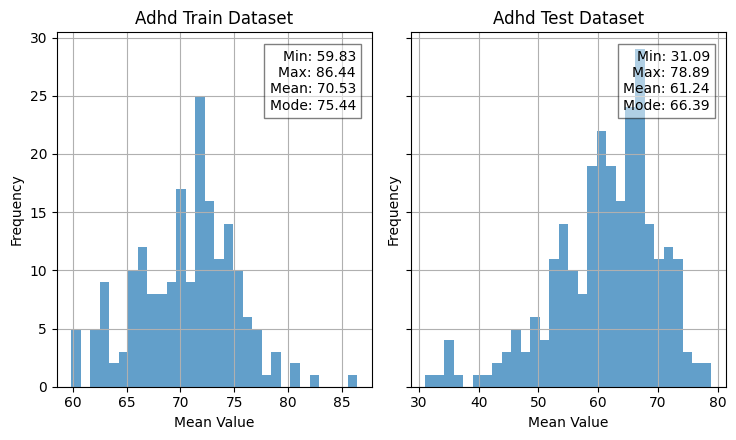

In [7]:
adhd_stats = calculate_stats(train_adhd)
adhd_stats_test = calculate_stats(test_adhd)

mean_per_row, _, _, _ = adhd_stats
mean_per_row_a_test, _, _, _ = adhd_stats_test

adhd_stats = stats_of_means(adhd_stats)
adhd_stats_test = stats_of_means(adhd_stats_test)


# plotting the distributions for both clipped datasets with the statistics of means as text annotations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7.48, 4.5), sharey='row')


# Plotting Autism Train Dataset statistics after clipping
axes[0].hist(mean_per_row, bins=30, alpha=0.7, label='Means Distribution')
#axes[0].axvline(autism_stats[2], color='red', linestyle='dashed', linewidth=2)
axes[0].set_title('Adhd Train Dataset')
axes[0].set_xlabel('Mean Value')
axes[0].set_ylabel('Frequency')
# Adding text for min, max, mean, and mode of means
axes[0].text(0.95, 0.95, f'Min: {adhd_stats[0]:.2f}\n' +
                          f'Max: {adhd_stats[1]:.2f}\n' +
                          f'Mean: {adhd_stats[2]:.2f}\n' +
                          f'Mode: {adhd_stats[3]:.2f}',
             ha='right', va='top', transform=axes[0].transAxes, bbox=dict(facecolor='white', alpha=0.5))

axes[0].grid(True)

# Plotting Autism Train Dataset statistics after clipping
axes[1].hist(mean_per_row_a_test, bins=30, alpha=0.7, label='Means Distribution')
#axes[0].axvline(autism_stats[2], color='red', linestyle='dashed', linewidth=2)
axes[1].set_title('Adhd Test Dataset')
axes[1].set_xlabel('Mean Value')
axes[1].set_ylabel('Frequency')
# Adding text for min, max, mean, and mode of means
axes[1].text(0.95, 0.95, f'Min: {adhd_stats_test[0]:.2f}\n' +
                          f'Max: {adhd_stats_test[1]:.2f}\n' +
                          f'Mean: {adhd_stats_test[2]:.2f}\n' +
                          f'Mode: {adhd_stats_test[3]:.2f}',
             ha='right', va='top', transform=axes[1].transAxes, bbox=dict(facecolor='white', alpha=0.5))

axes[1].grid(True)


# Adjusting layout to prevent overlap
plt.tight_layout()
#plt.show()

In [8]:
def prepare_data_for_plotting(df):
    # Group by 'client_id' and 'target', then count the occurrences
    return df.groupby(['client_id', 'target']).size().unstack(fill_value=0)

# Prepare data from all four datasets
adhd_test_plot_data = prepare_data_for_plotting(test_adhd)
adhd_train_plot_data = prepare_data_for_plotting(train_adhd)

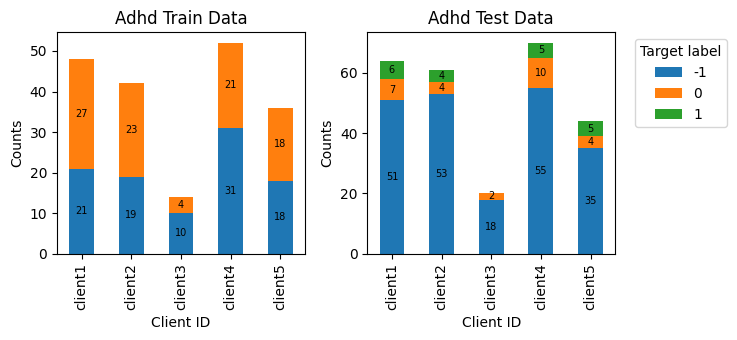

In [9]:
# Re-plot with integer counts in the bars, ensuring no decimal places are shown

# Create a 2x2 subplot layout with a specified width of 7.48 inches
fig, axs = plt.subplots(1, 2, figsize=(7.48, 3.5)) # Height is adjusted to maintain aspect ratio

# Define a function to add integer labels inside the bars
def add_int_labels(ax):
    for c in ax.containers:
        labels = [f'{int(v.get_height())}' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=7)

# Plot for Autism Train Data
adhd_train_plot_data.plot(kind='bar', stacked=True, ax=axs[0], legend=False)
axs[0].set_title('Adhd Train Data')
axs[0].set_xlabel('Client ID')
axs[0].set_ylabel('Counts')
add_int_labels(axs[0])


# Plot for Autism Test Data
adhd_test_plot_data.plot(kind='bar', stacked=True, ax=axs[1], legend=False)
axs[1].set_title('Adhd Test Data')
axs[1].set_xlabel('Client ID')
axs[1].set_ylabel('Counts')
add_int_labels(axs[1])

# Place the legend on the last plot
axs[1].legend(title='Target label', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

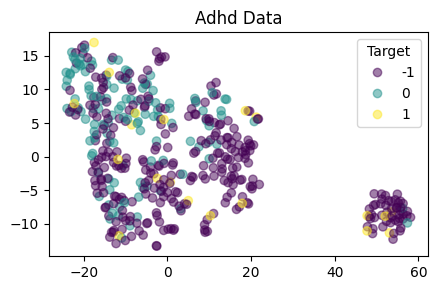

In [10]:
from sklearn.manifold import TSNE

# Concatenate train and test datasets separately for autism and intellectual disability
adhd_combined_df = pd.concat([train_adhd, test_adhd])

# Drop non-feature columns ('client_id', 'case_id', and 'target') from both combined datasets
adhd_features = adhd_combined_df.drop(['client_id', 'case_id', 'target'], axis=1)

# Fill missing values with the median for both datasets
adhd_features = adhd_features.fillna(adhd_features.median())

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Compute t-SNE for autism dataset
adhd_tsne = tsne.fit_transform(adhd_features)
adhd_combined_df['tsne-2d-one'] = adhd_tsne[:, 0]
adhd_combined_df['tsne-2d-two'] = adhd_tsne[:, 1]

# Create a figure with 2 columns and 1 row, with a total width of 7.48 inches
fig, ax = plt.subplots(1, 1, figsize=(4.48, 3))

# Autism dataset t-SNE plot
sc1 = ax.scatter(adhd_combined_df['tsne-2d-one'], adhd_combined_df['tsne-2d-two'],
                    c=adhd_combined_df['target'], cmap='viridis', alpha=0.5)
ax.set_title('Adhd Data')


handles1, labels1 = sc1.legend_elements(prop="colors", alpha=0.5)

ax.legend(handles1, ['-1', '0', '1'], title="Target")

# For the intellectual disability plot
#handles2, labels2 = sc2.legend_elements(prop="colors", alpha=0.5)
#ax[1].legend(handles2, ['-1','0', '1'], title="Target")


# Show the plot with tight layout
plt.tight_layout()
plt.show()

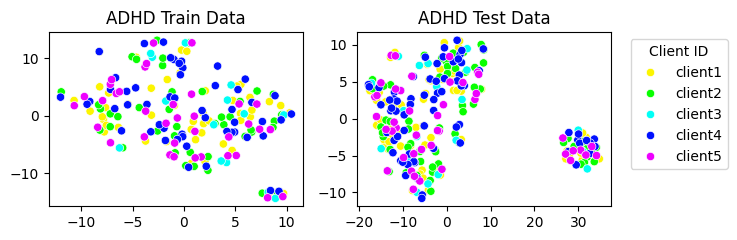

In [12]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler


# Re-define the function to plot t-SNE without showing the plot immediately, to allow for subplotting
def get_tsne_results(df):
    # Exclude 'case_id', 'client_id', and 'target' columns
    features = df.drop(['case_id', 'client_id', 'target'], axis=1)
    # Fit t-SNE with 2 components
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features)
    return tsne_results, df['client_id']

# Get t-SNE results for both datasets
adhd_train_tsne_results, adhd_train_client_ids = get_tsne_results(train_adhd)
adhd_test_tsne_results, adhd_test_client_ids = get_tsne_results(test_adhd)


# Create a figure with 2 subplots (1 row, 2 columns) and a specified width of 7.48 inches
fig, axs = plt.subplots(1, 2, figsize=(7.48, 2.5)) # Height adjusted to keep aspect ratio

# Plot for ADHD Train Data
sns.scatterplot(
    x=adhd_train_tsne_results[:, 0],
    y=adhd_train_tsne_results[:, 1],
    hue=adhd_train_client_ids,
    palette=sns.color_palette("hsv", len(adhd_train_client_ids.unique())),
    legend=False,
    ax=axs[0]
)
axs[0].set_title('ADHD Train Data')

# Plot for ADHDH Test Data
sns.scatterplot(
    x=adhd_test_tsne_results[:, 0],
    y=adhd_test_tsne_results[:, 1],
    hue=adhd_test_client_ids,
    palette=sns.color_palette("hsv", len(adhd_test_client_ids.unique())),
    legend='full',
    ax=axs[1]
)
axs[1].set_title('ADHD Test Data')
axs[1].legend(title='Client ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap and display the figure
plt.tight_layout()
plt.show()